# Урок 2. Метрики качества классификации ч.1

В уроке мы разбирали матрицу ошибок и некоторые метрики, основанные на терминах матрицы ошибок. Здесь же посмотрим, как эти метрики применять на практике и что  по ним можно выяснить.

### 1.1
Выкачайте тренировочный датасет Titanic - train.csv - с сайта [kaggle](https://www.kaggle.com/c/titanic/data). С помощью функции pd.read_csv() загрузите данные в датафрейм. Выведите первые 20 строк и проанализируйте данные: какие колонки присутствуют (более конкретная информация по ним есть на сайте kaggle), каким образом в них обозначены данные и какие типы данных используются (используйте pandas.dtypes). 

In [1]:
import pandas as pd
import numpy as np

In [2]:
### YOUR CODE HERE ###
df = pd.read_csv('train.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.describe(include = [np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Boulos, Mr. Hanna",male,CA. 2343,G6,S
freq,1,577,7,4,644


### 1.2
Проверьте, имеются ли пропущенные значения в колонках, и выведите сумму всех пропущенных значений в каждой из колонок.

In [7]:
### YOUR CODE HERE ###
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### 1.3
Замените все пропущенные значения колонки Age на медианы в зависимости от пола человека: т.е. если пол человека в строке с пропущенным значением "male", заменяете пропущенное значение возраста на медиану по всем известным возрастам мужчин, и наоборот. Выведите медианы возраста в зависимости от пола. Пропущенные значения колонок Cabin и Embarked замените на U (Unknown).

Примечание: для группировки по полу можно использовать метод df.groupby(), который имеет встроенные агрегатные функции (в т.ч. для вычисления медианы).  Для установки пропущенных значений в датасете воспользуйтесь функцией df.apply().

In [8]:
### YOUR CODE HERE ###
df = pd.read_csv('train.csv')
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [9]:
age_male_median = df[df.Sex == 'male'].Age.median()
age_female_median = df[df.Sex == 'female'].Age.median()
age_male_median, age_female_median

(29.0, 27.0)

In [10]:
df.groupby('Sex').Age.median()

Sex
female    27.0
male      29.0
Name: Age, dtype: float64

In [11]:
df.loc[(df.Sex == 'male') & (df.Age.isnull()), 'Age'] = df[df.Sex == 'male'].Age.median() # замена пропусков медианой
df.loc[(df.Sex == 'female') & (df.Age.isnull()), 'Age'] = df[df.Sex == 'female'].Age.median() # замена пропусков медианой

In [12]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [13]:
df.fillna({'Cabin' : 'U', 'Embarked' : 'U'}, inplace = True) # замена пропусков 

In [14]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,U,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,U,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,U,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,U,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,U,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,U,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,U,C


### 1.4
Выведите возраст пассажиров с PassengerID = [6, 20]. Убедитесь, что заполнены все пропущенные значения (воспользуйтесь функцией df.isnull() ).

In [15]:
### YOUR CODE HERE ###
df[(df.PassengerId >= 6) & (df.PassengerId <= 20)].Age

5     29.0
6     54.0
7      2.0
8     27.0
9     14.0
10     4.0
11    58.0
12    20.0
13    39.0
14    14.0
15    55.0
16     2.0
17    29.0
18    31.0
19    27.0
Name: Age, dtype: float64

In [16]:
df[(df.PassengerId >= 6) & (df.PassengerId <= 20)].Age.isnull().sum()

0

Так как не все классификаторы могут работать с категориальными признаками, в данном случае необходимо заменить их на числовые.

Также можно было бы выделить расширенные признаки, такие как статус пассажира (Mr., Mrs., Miss., Dr., Master. и т.д.), собственный индекс билета, индекс палубы и другие, но здесь ограничимся выбором более простых признаков.

### 1.5
В колонке Sex замените значения на 0, если пол "male", и на 1, если "female". В колонке Embarked замените параметры "U", "S", "C", "Q" на 0, 1, 2, 3 соответственно. Отбросьте колонки PassengerId, Name, Ticket, Cabin. Выведите первые 20 строк получившегося набора данных.

In [17]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [18]:
df.Embarked.unique()

array(['S', 'C', 'Q', 'U'], dtype=object)

In [19]:
df.Sex.replace({'male' : 0, 'female' : 1}, inplace = True) # замена
df.Embarked.replace({'U' : 0, 'S' : 1, 'C' : 2, 'Q' : 3}, inplace = True) # замена

In [20]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,U,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,U,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,U,1
5,6,0,3,"Moran, Mr. James",0,29.0,0,0,330877,8.4583,U,3
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,1
7,8,0,3,"Palsson, Master. Gosta Leonard",0,2.0,3,1,349909,21.0750,U,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1,27.0,0,2,347742,11.1333,U,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.0,1,0,237736,30.0708,U,2


In [21]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis='columns', inplace=True) # удаление столбцов

In [22]:
df.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,2
2,1,3,1,26.0,0,0,7.9250,1
3,1,1,1,35.0,1,0,53.1000,1
4,0,3,0,35.0,0,0,8.0500,1
5,0,3,0,29.0,0,0,8.4583,3
6,0,1,0,54.0,0,0,51.8625,1
7,0,3,0,2.0,3,1,21.0750,1
8,1,3,1,27.0,0,2,11.1333,1
9,1,2,1,14.0,1,0,30.0708,2


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


### 1.6
Приступим к построению классификаторов. **Условимся, что, если функция или объект модели имеют параметр random_state, то устанавливаем его равным 17 в каждом из случаев.**

Разделите данные на тренировочный и тестовый датасеты, установив размер тестового как 0.25 (первая колонка Survived является целевой, поэтому необходимо сначала ее отделить от признаков).

In [24]:
from sklearn.model_selection import train_test_split 

In [25]:
### YOUR CODE HERE ###
Y = df.Survived.values # целевые значения
X = df.drop(['Survived'], axis='columns').values # признаки

In [26]:
X

array([[ 3.    ,  0.    , 22.    , ...,  0.    ,  7.25  ,  1.    ],
       [ 1.    ,  1.    , 38.    , ...,  0.    , 71.2833,  2.    ],
       [ 3.    ,  1.    , 26.    , ...,  0.    ,  7.925 ,  1.    ],
       ...,
       [ 3.    ,  1.    , 27.    , ...,  2.    , 23.45  ,  1.    ],
       [ 1.    ,  0.    , 26.    , ...,  0.    , 30.    ,  2.    ],
       [ 3.    ,  0.    , 32.    , ...,  0.    ,  7.75  ,  3.    ]])

In [27]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 17) 

### 1.7
Обучите на полученных выборках несколько классификаторов, которые импортированы ниже.

**Примечание: в методе ближайших соседей используйте количество соседей, равное 5.**

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

In [29]:
### YOUR CODE HERE ###
# К ближайших соседей
knn = KNeighborsClassifier(n_neighbors=5)
knn_model = knn.fit(x_train, y_train)
knn_predictions = knn.predict(x_test)

# Байесовский классификатор
nb = GaussianNB()
nb_model = nb.fit(x_train, y_train)
nb_predictions = nb.predict(x_test)

# Деревья решений
dtc = DecisionTreeClassifier(random_state = 17)
dtc_model = dtc.fit(x_train, y_train)
dtc_predictions = dtc.predict(x_test)

# Логистическая регрессия
lr = LogisticRegression(random_state = 17)
lr_model = lr.fit(x_train, y_train)
lr_predictions = lr.predict(x_test)

Очевидно, в этом случае использовать метрику accuracy, которую мы применяли до этого, не совсем правильно: она не даст верную оценку классификатору, потому как выживших явно меньше, чем погибших.

Вспомним про такие метрики как точность и полнота. Здесь они подойдут хорошо, так как у нас имеются положительный и отрицательный классы, и определить корректно один из них может оказаться более важным .

### 1.8
В каждом из пунктов следующего теста выберите, что важнее максимизировать: точность (precision) или полноту (recall). Выпишите ответы.

1. Вероятность того, что при определенной поломке самолета он сможет долететь до пункта назначения (1 - долетел, 0 - не долетел).
2. Предсказание, представляет ли человек опасность, по анализу психического состояния (1 - представляет опасность, 0 - не представляет опасности).
3. Предсказание ухода клиента (1 - клиент ушел, 0 - остался).
4. Выявление рака на основе медицинских показателей (1 - болен раком, 0 - здоров).
5. Предсказание летальности при наблюдаемой мутации (1 - выживание, 0 - летальный исход).
6. Определение важности происшествия для экстренных служб (1 - важно, 0 - неважно).
7. Окупятся ли вложения в бизнес (1 - окупятся, 0 - не окупятся).

Ваш ответ:

1. точность (ошибка да хуже чем ошибка нет) <br>
2. полнота (ошибка нет хуже чем ошибка да) <br>
3. полнота (ошибка нет хуже чем ошибка да) <br>
4. полнота (ошибка нет хуже чем ошибка да) <br>
5. точность (ошибка да хуже чем ошибка нет) <br>
6. полнота (ошибка нет хуже чем ошибка да) <br>
7. точность (ошибка да хуже чем ошибка нет) <br>

### 1.9
Определите, что важнее использовать в случае датасета Titanic: полноту или точность. Объясните, почему.

точность (ошибка да хуже чем ошибка нет)

### 1.10
Для каждого классификатора выведите матрицу ошибок и самостоятельно рассчитайте метрику recall (расчеты должны присутствовать). Проверьте расчеты, воспользовавшись встроенной метрикой recall_score.

In [30]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score

In [31]:
predictions = [knn_predictions, nb_predictions, dtc_predictions, lr_predictions]

In [32]:
n = 0
for name in predictions:
    n += 1
    
    TP = sum ((y_test == 1) & (name == 1))
    FN = sum ((y_test == 1) & (name == 0))
    FP = sum ((y_test == 0) & (name == 1))
    TN = sum ((y_test == 0) & (name == 0))
    
    recall = TP / (TP + FN)
    recall_score_ = recall_score(y_test, name)
    
    precision = TP / (TP + FP)
    precision_score_ = precision_score(y_test, name)
    
    F1_score = 2 * recall * precision / (recall + precision)
    F1_score_ = f1_score(y_test, name)
    
    if n == 1:
        confusion_matrix_ = np.append(confusion_matrix(y_test, name).ravel(), [recall_score_, precision_score_, F1_score_])
        confusion_matrix__ = np.array([TN, FP, FN, TP, recall, precision, F1_score])
    else:
        confusion_matrix_ = np.vstack( ( confusion_matrix_, np.append(confusion_matrix(y_test, name).ravel(),\
                                                                      [recall_score_, precision_score_, F1_score_]) ) )
        confusion_matrix__ = np.vstack( ( confusion_matrix__, np.array([TN, FP, FN, TP, recall, precision, F1_score]) ) )
        
confusion_matrix_ == confusion_matrix__ # проверка

array([[ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True],
       [ True,  True,  True,  True,  True,  True,  True]])

In [33]:
idx = ['knn', 'nb', 'dtc', 'lr']
col = ['tn', 'fp', 'fn', 'tp', 'recall_score', 'precision_score', 'f1_score']
df = pd.DataFrame(confusion_matrix_, columns = col, index = idx)
df

,tn,fp,fn,tp,recall_score,precision_score,f1_score
knn,110.0,21.0,47.0,45.0,0.489130,0.681818,0.569620
nb,111.0,20.0,27.0,65.0,0.706522,0.764706,0.734463
dtc,112.0,19.0,26.0,66.0,0.717391,0.776471,0.745763
lr,114.0,17.0,28.0,64.0,0.695652,0.790123,0.739884


### 1.11
Выберите ту модель, на которой метрика recall давала лучший ответ, и рассчитайте для нее precision, используя встроенную функцию.

In [34]:
from sklearn.metrics import precision_score

In [35]:
df[df.recall_score == df.recall_score.max()].index[0] # модель

'dtc'

In [36]:
### YOUR CODE HERE ###
df.recall_score.max()

0.717391304347826

In [37]:
df[df.recall_score == df.recall_score.max()].precision_score.values

array([0.77647059])

In [38]:
print ('модель = %s, recall_score = %f, precision_score = %f' % \
       (df[df.recall_score == df.recall_score.max()].index[0], df.recall_score.max(), df[df.recall_score == df.recall_score.max()].precision_score.values))

модель = dtc, recall_score = 0.717391, precision_score = 0.776471


# Урок 4. Метрики качества классификации ч.2

Продолжим работу с метриками классификации. В предыдущем задании мы разобрали матрицу ошибок и две основные метрики, которые используются при бинарной классификации.

Сейчас рассмотрим F-меру - совокупную метрику по precision и recall - и более сложную AUC-ROC.

### 2.1
Из задания к предыдущему уроку выберите классификатор, который давал наименьшее значение recall, вычислите для него precision, применив precision_score, и самостоятельно посчитайте F1-меру (расчеты должны присутствовать). Затем проверьте ответ, используя встроенную функцию.

Сравните полученную f1-меру со значением среднего арифметического полноты и точности.

In [39]:
from sklearn.metrics import precision_score, f1_score

In [40]:
### YOUR CODE HERE ###
rec_knn = df.recall_score.min()
pr_knn = df[df.recall_score == df.recall_score.min()].precision_score.values[0]

In [41]:
F1_knn = 2 * rec_knn * pr_knn / (rec_knn + pr_knn)
F1_knn

0.5696202531645569

In [42]:
df[df.recall_score == df.recall_score.min()].index[0] # модель

'knn'

In [43]:
ind = df.index.get_indexer([df[df.recall_score == df.recall_score.min()].index[0]])[0] # номер модели
ind

0

In [44]:
f1_score(y_test, predictions[ind]) == F1_knn # проверка

True

In [45]:
print ('модель = %s, recall_score = %f, precision_score = %f, F1 = %f' % \
       (df[df.recall_score == df.recall_score.min()].index[0], rec_knn, pr_knn, F1_knn))

модель = knn, recall_score = 0.489130, precision_score = 0.681818, F1 = 0.569620


In [46]:
(pr_knn + rec_knn) / 2 > F1_knn
# F1 ближе к меньшему из значений recall_score или precision_score 

True

В библиотеке sklearn есть удобная функция classification_report, возвращающая precision, recall, F-меру и количество экземпляров каждого класса в удобном для чтения формате. Также существует функция precision_recall_fscore_support, возвращающая те же самые метрики, но в форме массива.

### 2.2
Для каждого классификатора из предыдущего урока рассчитайте и выведите следующие импортированные метрики.

In [47]:
from sklearn.metrics import precision_recall_fscore_support, classification_report

In [48]:
df

,tn,fp,fn,tp,recall_score,precision_score,f1_score
knn,110.0,21.0,47.0,45.0,0.489130,0.681818,0.569620
nb,111.0,20.0,27.0,65.0,0.706522,0.764706,0.734463
dtc,112.0,19.0,26.0,66.0,0.717391,0.776471,0.745763
lr,114.0,17.0,28.0,64.0,0.695652,0.790123,0.739884


In [49]:
### YOUR CODE HERE ###
n = 0
for name in predictions:
    
    print(idx[n], ':')
    print(precision_recall_fscore_support(y_test, name))
    print(classification_report(y_test, name))
    
    n += 1
    

knn :
(array([0.70063694, 0.68181818]), array([0.83969466, 0.48913043]), array([0.76388889, 0.56962025]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.70      0.84      0.76       131
           1       0.68      0.49      0.57        92

    accuracy                           0.70       223
   macro avg       0.69      0.66      0.67       223
weighted avg       0.69      0.70      0.68       223

nb :
(array([0.80434783, 0.76470588]), array([0.84732824, 0.70652174]), array([0.82527881, 0.73446328]), array([131,  92], dtype=int64))
              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.76      0.71      0.73        92

    accuracy                           0.79       223
   macro avg       0.78      0.78      0.78       223
weighted avg       0.79      0.79      0.79       223

dtc :
(array([0.8115942 , 0.77647059]), array([0.85496183, 0.7173913 ])

Вернемся к классификатору LogisticRegression, который мы обучали в предыдущем задании. Там мы не затрагивали настройку гиперпараметров: сделать это можно с помощью LogisticRegressionCV - перебора параметров по сетке с последующей кросс-валидацией (по сути это аналог GridSearchCV, но со своими параметрами внутри, применимыми только к логистической регрессии). Этот класс создан специально для логистической регрессии, т.к. для нее известны эффективные алгоритмы перебора параметров.

У LogisticRegression есть гиперпараметр C - обратный коэффициент регуляризации. Не вдаваясь в подробное описание по формуле, можно сказать, что C соответствует "сложности" модели: чем больше C, тем более сложные зависимости может восстанавливать модель; если параметр C слишком мал (слишком сильная регуляризация), то модель окажется недообученной, а если наоборот регуляризация слишком слабая (т.е. C принимает большие значения), то скорее всего модель окажется переобученной, потому как модель будет слишком "бояться" ошибиться на обучающей выборке.

### 2.3 

1. Используя StratifiedKFold, разбейте данные для кросс-валидации по 5-ти блокам (не забывайте во всех методах использовать random_state=17).
2. С помощью numpy.logspace разбейте интервал (-1, 2) на 500 значений.
3. С помощью LogisticRegressionCV подберите оптимальный параметр C: установите гиперпараметр Cs равным объекту из п.2 (разбиение интервала (-1, 2) отвечает за подбор обратного коэффициента регуляризации C); cv равным объекту из п.1 (разбиение для кросс-валидации); scoring равным "roc_auc" (отвечает за оптимизацию гиперпараметров на кросс-валидации: метрика, установленная в scoring, контролирует, как оценивать модель при каждом из наборе параметров, т.е. показывает, какая метрика должна быть наилучшей).
4. Обучите полученную модель на тренировочных данных.

In [50]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegressionCV
import numpy as np

In [52]:
### YOUR CODE HERE ###
# разбиение с помощью StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 17, shuffle = True)
for train_index, test_index in skf.split(X, Y):
    X_train, X_test = X[train_index], X[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

In [68]:
lr_cv = LogisticRegressionCV(cv = skf, Cs = np.logspace(-1, 2, num = 500), scoring = "roc_auc", random_state=17, max_iter = 200)
lr_cv_model = lr_cv.fit(X_train, Y_train) # X_train, Y_train или Х, У
lr_cv_predictions = lr_cv.predict(X_test)

### 2.4
Используя метод plot из matplotlib.pyplot, выведите график зависимости auc_roc от значения C.

*Примечание: значения по оси x - разбиение с помощью np.logspace из п.2 предыдущего задания, а значения по оси y - среднее значение roc_auc по каждой валидации, т.е. среднее значение из полученных на каждом из 5-ти разбиений при данном параметре C (используйте метод scores_ объекта, который инкапсулирует LogisticRegressionCV).*

In [69]:
import matplotlib.pyplot as plt

In [70]:
lr_cv.scores_[1].shape
# 5 - cv, 500 - Cs

(5, 500)

In [71]:
roc_auc = lr_cv.scores_[1]
roc_auc

array([[0.83181818, 0.83181818, 0.83181818, ..., 0.83450413, 0.83450413,
        0.83450413],
       [0.85444215, 0.85464876, 0.85464876, ..., 0.85464876, 0.85464876,
        0.85464876],
       [0.88295455, 0.88295455, 0.88316116, ..., 0.8821281 , 0.8821281 ,
        0.8821281 ],
       [0.84732744, 0.84753788, 0.84732744, ..., 0.84774832, 0.84774832,
        0.84774832],
       [0.7890362 , 0.78882576, 0.78945707, ..., 0.79303451, 0.79324495,
        0.79303451]])

In [72]:
# средние значения
roc_auc_av = roc_auc.sum(axis = 0) / roc_auc.shape[0]
roc_auc_av

array([0.8411157 , 0.84115702, 0.84128252, 0.84124043, 0.84107515,
       0.84115779, 0.841118  , 0.84124426, 0.84132461, 0.84128405,
       0.84132844, 0.84124503, 0.84124503, 0.84128635, 0.84136823,
       0.84141108, 0.84145317, 0.84166131, 0.84174395, 0.84157637,
       0.84161769, 0.8415756 , 0.84153352, 0.84149296, 0.84141032,
       0.84153658, 0.84153658, 0.84149449, 0.8415779 , 0.84161999,
       0.84170263, 0.84174395, 0.84174319, 0.8418266 , 0.84186792,
       0.84199189, 0.84211892, 0.84207606, 0.84203474, 0.84220233,
       0.84228574, 0.84224365, 0.84224365, 0.84224212, 0.84228421,
       0.84224135, 0.84228421, 0.84232553, 0.8425329 , 0.84257499,
       0.84257499, 0.84270125, 0.84270125, 0.84286807, 0.8427862 ,
       0.84278543, 0.84299204, 0.84270355, 0.84270355, 0.84278543,
       0.84266146, 0.8427862 , 0.84270202, 0.8427862 , 0.8426607 ,
       0.8426607 , 0.84270432, 0.84257882, 0.84249617, 0.84245409,
       0.84257805, 0.84266223, 0.84262014, 0.84270355, 0.84266

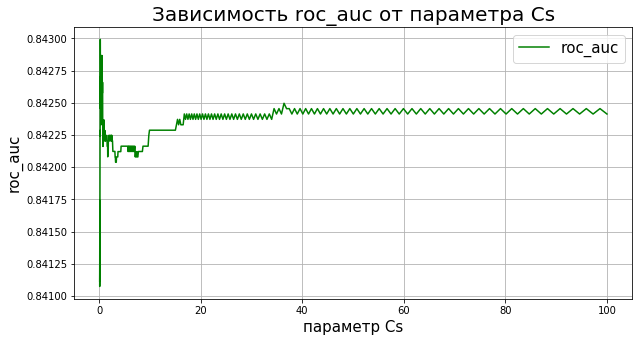

In [73]:
### YOUR CODE HERE ###
plt.figure(figsize=(10, 5)) 
plt.plot(np.logspace(-1, 2, num = 500), roc_auc_av, c='g', label ='roc_auc')
plt.xlabel('параметр Cs', fontsize=15)
plt.ylabel('roc_auc', fontsize=15)
plt.title('Зависимость roc_auc от параметра Cs', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

### 2.5
С помощью метода C_ того же объекта выведите лучшее значение C. Выведите более конкретную область графика (область ~15 точкам по x), включающую лучшее значение C.

*Примечание: используйте plt.xlim.*

In [74]:
### YOUR CODE HERE ###
lr_cv.C_[0]

0.21710676025372655

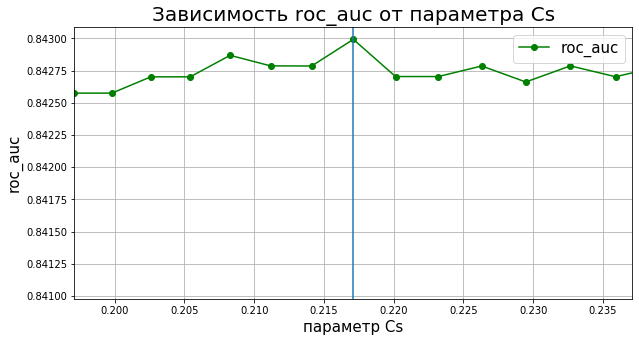

In [77]:
plt.figure(figsize=(10, 5)) 
plt.plot(np.logspace(-1, 2, num = 500), roc_auc_av, c='g', marker = 'o',label ='roc_auc')
plt.axvline(x = lr_cv.C_)
plt.xlim(lr_cv.C_[0] - 0.02, lr_cv.C_[0] + 0.02)
#plt.ylim(0.84, 0.8415)
plt.xlabel('параметр Cs', fontsize=15)
plt.ylabel('roc_auc', fontsize=15)
plt.title('Зависимость roc_auc от параметра Cs', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

### 2.6
С помощью метода predict_proba получите вероятности принадлежности объектов тестовой выборки к классам. Постройте график roc_auc для тестовой выборки и выведите значение auc.

**Пример** построения графика.

In [63]:
from sklearn.metrics import roc_auc_score, roc_curve

In [64]:
probas = lr_cv.predict_proba(X_test)  # вероятности принадлежности объектов тестовой выборки к классам
probas

array([[0.82387067, 0.17612933],
       [0.45649149, 0.54350851],
       [0.32177973, 0.67822027],
       [0.81686956, 0.18313044],
       [0.24048864, 0.75951136],
       [0.50903958, 0.49096042],
       [0.45201228, 0.54798772],
       [0.6348074 , 0.3651926 ],
       [0.41789257, 0.58210743],
       [0.58083099, 0.41916901],
       [0.07463933, 0.92536067],
       [0.84118317, 0.15881683],
       [0.63723769, 0.36276231],
       [0.89079814, 0.10920186],
       [0.84131267, 0.15868733],
       [0.20366656, 0.79633344],
       [0.30046861, 0.69953139],
       [0.77346356, 0.22653644],
       [0.8561569 , 0.1438431 ],
       [0.62491292, 0.37508708],
       [0.86903471, 0.13096529],
       [0.33910556, 0.66089444],
       [0.87955745, 0.12044255],
       [0.82403034, 0.17596966],
       [0.2945984 , 0.7054016 ],
       [0.8796208 , 0.1203792 ],
       [0.96127243, 0.03872757],
       [0.283829  , 0.716171  ],
       [0.87297296, 0.12702704],
       [0.71212389, 0.28787611],
       [0.

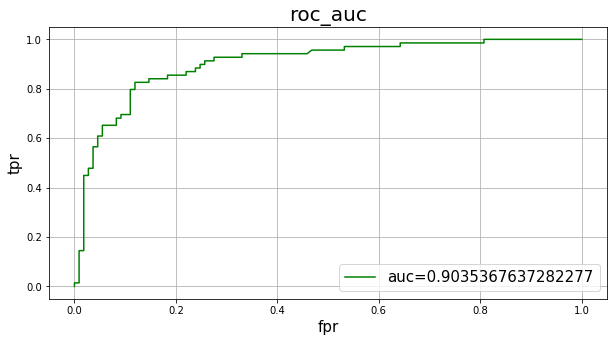

In [65]:
fpr, tpr, _ = roc_curve(Y_test, probas[:, 1]) # рок кривая

auc = roc_auc_score(Y_test, probas[:, 1]) # значение auc - площадь под кривой

plt.figure(figsize=(10, 5))
plt.plot(fpr, tpr,  c='g', label="auc=" + str(auc))
plt.xlabel('fpr', fontsize=15)
plt.ylabel('tpr', fontsize=15)
plt.title('roc_auc', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()